# Projeto 9: Cafeteria Robô em Los Angeles.

Neste projeto, vamos preparar uma pesquisa de mercado analisando dados sobre restaurantes em Los Angeles, para entender melhor as condições do mercado e se uma cafeteria com garções robô é ou não um bom negócio.

A apresentação para este estudo:

Presentation: <https://drive.google.com/file/d/1h9Y9mNh5bgurry7ljkf-NVdAcJW9hKc7/view?usp=sharing> 

## Importando Bibliotecas e dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Vamos chamar o conjunto de dados sobre restaurantes em L.A.de rest_data

In [2]:
rest_data = pd.read_csv('/datasets/rest_data_us.csv')

Agora precisamos preparar os dados para a análise.

### Pré processamento de dados

Podem haver erros nos conjuntos de dados, por isso vamos verificar se algo precisa ser feito antes de começar a trabalhar nos dados.

In [3]:
rest_data.head(10)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


<b>Descrição de dados</b>
Tabela rest_data:
- `id` — identificação do estabelecimento 
- `object_name` — nome do estabelecimento
- `chain` — estabelecimento de rede (TRUE/FALSE)
- `object_type` — tipo de estabelecimento
- `address` — endereço
- `number` — número de assentos

In [4]:
rest_data.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [5]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


Vamos garantir que a coluna "chain" seja do tipo booleano

In [6]:
rest_data['chain'] = rest_data['chain'].astype(bool)

Agora que os dados estão no tipo certo, vamos verificar se existem valores duplicados e converter os nomes para letras minúsculas para conseguir comparar melhor.

In [7]:
#Verificando se há linhas inteiras duplicadas
rest_data.duplicated().sum()

0

In [8]:
# Verificando apenas se há IDs dos restaurantes duplicados
rest_data['id'].duplicated().sum()

0

In [9]:
# Verificando apenas se há nomes de resturantes duplicados
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()
rest_data[rest_data.duplicated(subset='object_name')]

,id,object_name,address,chain,object_type,number
128,11914,admirals club,500 world way,False,Restaurant,205
309,12095,the veggie grill,6374 w sunset blvd ste #a,True,Restaurant,69
349,12135,waba grill,5527 hollywood blvd,True,Restaurant,111
380,12166,donut star,11079 w pico blvd,True,Fast Food,27
388,12174,trimana,3550 wilshire blvd ste #116,True,Restaurant,33
...,...,...,...,...,...,...
9605,21391,yamakase,11901 santa monica blvd # 111,True,Restaurant,22
9608,21394,go get em tiger,230 n larchmont blvd,True,Restaurant,5
9627,21413,pizza buona,922 n alavarado st ste c,True,Pizza,5
9639,21425,mcdonald's,1800 s western ave,True,Fast Food,135


In [10]:
rest_data.drop_duplicates(subset='object_name', keep=False)

,id,object_name,address,chain,object_type,number
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26
1,11787,reilly's,100 world way # 120,False,Restaurant,9
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22
4,11790,pollen,2100 echo park ave,False,Restaurant,20
...,...,...,...,...,...,...
9645,21431,saint marc,10250 santa monica blvd # 1025,False,Restaurant,225
9646,21432,hall of justice,217 w temple ave,False,Restaurant,122
9647,21433,fin-melrose,5750 melrose ave,False,Restaurant,93
9649,21435,medidate coffee,548 s spring st ste 100,False,Cafe,6


In [11]:
#Verificando valores nulos
rest_data.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

Parece tudo certo para começarmos as análises.

## Análise de dados

### Investigando as proporções

Primeiramente, vamos descobrir quantos estabelecimentos estamos analisando.

In [12]:
# Contar o número total de estabelecimentos
total_rest = len(rest_data)

print(f"O número total de estabelecimentos é: {total_rest}")

O número total de estabelecimentos é: 9651


#### Investigando as proporções de vários tipos de estabelecimentos.

In [13]:
# Contar o número de estabelecimentos para cada tipo
count_per_type = rest_data['object_type'].value_counts()

print("Número de estabelecimentos por tipo:")
print(count_per_type)

Número de estabelecimentos por tipo:
Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64


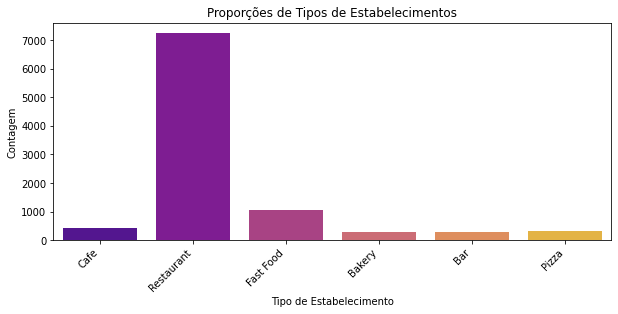

In [14]:
# Gráfico de contagem por tipo de estabelecimento
plt.figure(figsize=(10, 4))
sns.countplot(x='object_type', data=rest_data, palette='plasma')
plt.title('Proporções de Tipos de Estabelecimentos')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.show()

De 9651 estabelecimentos, a grande maioria é do tipo “Restaurante” (7255 locais). Isso pode ser um forte indicativo da preferência dos moradores e frequentadores da região, porém uma cafeteria teria menor concorrência.

#### Investigando as proporções de estabelecimentos de rede ou não.

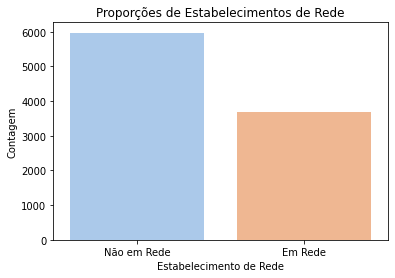

In [15]:
#Proporções de estabelecimentos de rede e não
plt.figure(figsize=(6, 4))
sns.countplot(x='chain', data=rest_data, palette='pastel')
plt.title('Proporções de Estabelecimentos de Rede')
plt.xlabel('Estabelecimento de Rede')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Não em Rede', 'Em Rede'])
plt.show()

Do total de estabelecimentos, quase 6000 não estão ligados a uma rede. Isso nos leva a acreditar que não estar ligado a uma rede seja um bom negócio, mas precisamos olhar essas informações mais de perto.

### Qual tipo de establecimento é típico para redes?

Para responder à essa pergunta, podemos realizar uma análise comparativa entre os tipos de estabelecimentos que são parte de redes (chain) e aqueles que não são.

In [16]:
#Analisando tipos de estabelecimentos para redes
chain_type_counts = rest_data[rest_data['chain'] == True]['object_type'].value_counts().reset_index()
chain_type_counts

,index,object_type
0,Restaurant,2294
1,Fast Food,605
2,Bakery,283
3,Cafe,266
4,Pizza,154
5,Bar,77


In [17]:
#Analisando tipos de estabelecimentos para NÃO redes
non_chain_type_counts = rest_data[rest_data['chain'] == False]['object_type'].value_counts().reset_index()
non_chain_type_counts

,index,object_type
0,Restaurant,4961
1,Fast Food,461
2,Bar,215
3,Cafe,169
4,Pizza,166


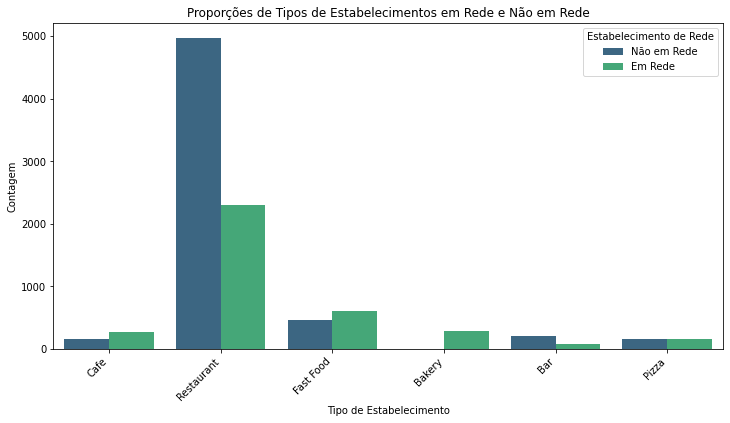

In [18]:
# Gráfico de contagem por tipo de estabelecimento
plt.figure(figsize=(12, 6))
sns.countplot(x='object_type', data=rest_data, hue='chain', palette='viridis')
plt.title('Proporções de Tipos de Estabelecimentos em Rede e Não em Rede')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estabelecimento de Rede', labels=['Não em Rede', 'Em Rede'])
plt.show()

O gráfico inclui barras empilhadas para cada tipo de estabelecimento, diferenciando entre estabelecimentos em redes e fora de redes. Isso nos permite uma comparação visual mais clara das proporções de tipos de estabelecimentos em cada categoria. 

Para estabelecimentos do tipo "Restaurante" é possível ver que o número de estabelecimentos que não pertencem a uma rede é maior que o dobro, já para fast food, padaria e cafeteria existem mais estabelecimentos ligados a uma rede.

### O que caracteriza redes: muitos estabelecimentos com um pequeno número de assentos ou poucos estabelecimentos com uitos assentos?

Para responder à pergunta, podemos analisar a distribuição do número de assentos para estabelecimentos em redes e fora de redes:

Primeiro, vamos analisar o estabelecimentos por ruas.

In [19]:
# Colocando dados dos nomes das ruas em uma coluna separada
rest_data['street'] = rest_data['address'].apply(lambda x: x.split(',')[0])

In [20]:
rest_data.head()

,id,object_name,address,chain,object_type,number,street
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26,3708 n eagle rock blvd
1,11787,reilly's,100 world way # 120,False,Restaurant,9,100 world way # 120
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20,6801 hollywood blvd # 253
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22,1814 w sunset blvd
4,11790,pollen,2100 echo park ave,False,Restaurant,20,2100 echo park ave


Agora nossa tabela tem as seguintes colunas:
<b>Descrição de dados</b>
Tabela rest_data:
- `id` — identificação do estabelecimento 
- `object_name` — nome do estabelecimento
- `chain` — estabelecimento de rede (TRUE/FALSE)
- `object_type` — tipo de estabelecimento
- `address` — endereço
- `number` — número de assentos
- `street` — nome das ruas de cada estabelecimento

Agora vamos comparar a distribuição de número de assentos entre estabelecimentos em redes e fora de redes

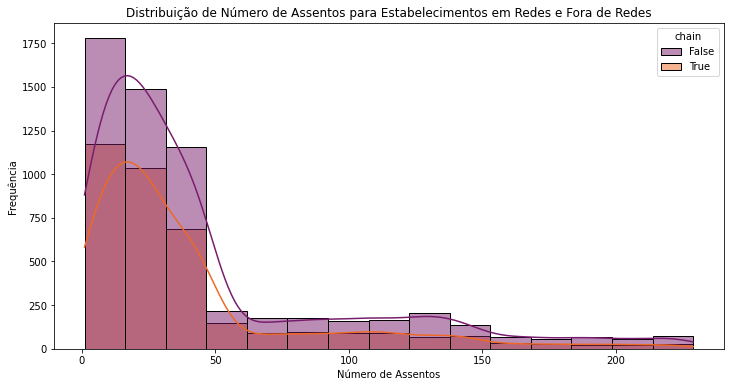

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(rest_data, x='number', hue='chain', bins=15, kde=True, palette='inferno')
plt.title('Distribuição de Número de Assentos para Estabelecimentos em Redes e Fora de Redes')
plt.xlabel('Número de Assentos')
plt.ylabel('Frequência')
plt.show()

No gráfico, conseguimos ver que os estabelecimentos com <b>menor</b> número de assentos, são mais frequentes em restaurantes de rede. E menos frequentes em restaurantes que não fazem parte de uma rede.

Isso nos leva a acreditar que as redes tendem a ter muitos estabelecimentos com um pequeno número de assentos, com base nos dados disponíveis.

### Gráfico de dez ruas com o maior número de restaurantes.

Vamos ver quais ruas tem mais restaurantes:

In [22]:
top_10_streets = rest_data['street'].value_counts().reset_index()
top_10_streets.head(10)

,index,street
0,3607 trousdale pkwy,11
1,135 n grand ave,10
2,5151 state university dr,9
3,600 world way,9
4,400 world way,9
5,545 s figueroa st,8
6,700 world way,8
7,2025 avenue of the stars,8
8,300 world way,8
9,100 world way,6


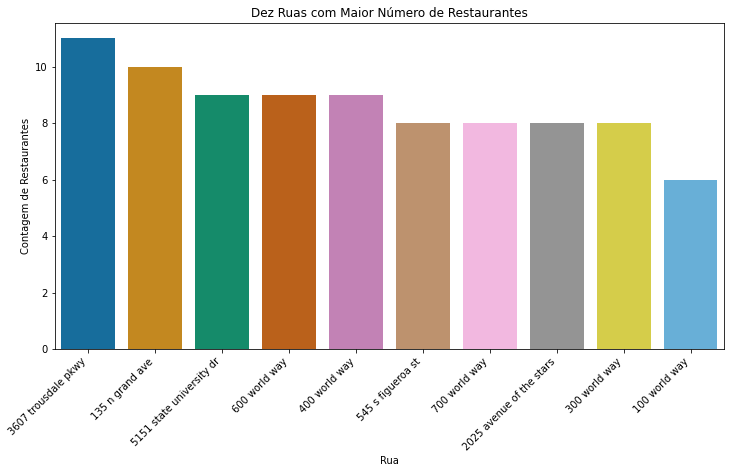

In [23]:
# Gráfico de contagem das dez ruas com mais restaurantes
plt.figure(figsize=(12, 6))
top_10_streets = rest_data['street'].value_counts().head(10)
sns.barplot(x=top_10_streets.index, y=top_10_streets.values, palette='colorblind')
plt.title('Dez Ruas com Maior Número de Restaurantes')
plt.xlabel('Rua')
plt.ylabel('Contagem de Restaurantes')
plt.xticks(rotation=45, ha='right')
plt.show()

O gráfico de barras mostra a contagem de restaurantes nas 10 ruas com mais estabelecimentos. Isso fornece uma visão geral de quais ruas são mais populares em termos de restaurantes. São mais de 10 restaurantes apenas na rua 3607 Trousdale Pkwy.

E quantas ruas tem apenas um restaurante:

In [24]:
# Número de ruas que têm apenas um restaurante
single_restaurant_streets = rest_data['street'].value_counts()[rest_data['street'].value_counts() == 1].count()
print(f"Número de ruas com apenas um restaurante: {single_restaurant_streets}")

Número de ruas com apenas um restaurante: 7598


###  Distribuição do número de assentos para as ruas que tem muitos restaurantes

Como são muitas ruas, e muitos resturantes, vamos considerar apenas as 10 ruas com mais restaurantes, como já foi determinado anteriormente.

In [25]:
top_10_restaurant_streets = top_10_streets.index

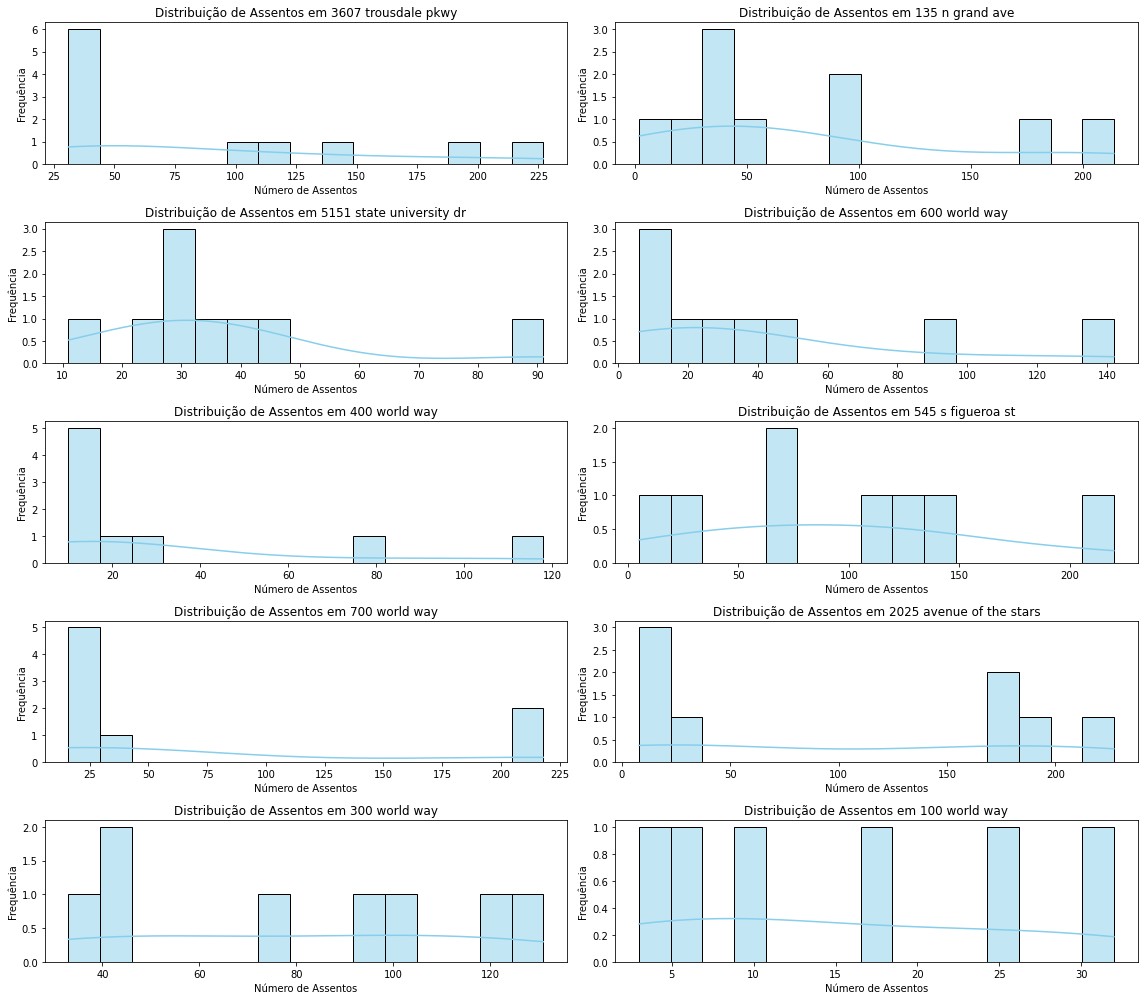

In [26]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 14))

for i, street in enumerate(top_10_restaurant_streets):
    row, col = divmod(i, 2)
    subset_data = rest_data[rest_data['street'] == street]
    sns.histplot(subset_data['number'], bins=15, kde=True, color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(f'Distribuição de Assentos em {street}')
    axes[row, col].set_xlabel('Número de Assentos')
    axes[row, col].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

A análise visual do histograma nos permite identificar padrões na distribuição de assentos. Cada subplot representa a distribuição de assentos em um restaurante específico de uma das 10 ruas principais.
O eixo x mostra o número de assentos, e o eixo y mostra a frequência (quantidade de restaurantes) para cada faixa de assentos.

<b>Variação na Capacidade de Assentos:</b>

- As distribuições mostram uma variação significativa na capacidade de assentos entre os restaurantes em uma mesma rua.
- Alguns restaurantes têm capacidade de assentos relativamente baixa, enquanto outros têm capacidade consideravelmente maior.

<b>Picos e Concentrações:</b>

- Alguns gráficos apresentam picos na distribuição, indicando que existe uma concentração de restaurantes com capacidades de assentos semelhantes.
- Esses picos podem sugerir preferências locais ou práticas comuns naquela área em relação à capacidade dos estabelecimentos.

<b>Assimetrias na Distribuição:</b>

- Em algumas ruas, a distribuição de assentos pode ser assimétrica, indicando que há uma tendência para restaurantes com capacidade de assentos maior ou menor, dependendo da rua. Como na rua 2025 Avenue of the Stars, por exemplo.

<b>Outliers:</b>

- Outliers podem ser identificados como restaurantes que se destacam da distribuição principal em termos de capacidade de assentos.
- Esses outliers podem representar estabelecimentos únicos na área, com capacidades muito grandes ou muito pequenas em comparação com outros, como na rua 3607 Trousdale Pkwy, onde há um restaurante com mais de 200 assentos.

<b>Padrões de Preferência do Consumidor:</b>

- Ao analisar as distribuições, é possível inferir padrões de preferência do consumidor em relação ao tamanho do estabelecimento.
- Ruas com distribuições mais uniformes podem indicar uma preferência diversificada, enquanto aquelas com distribuições mais concentradas podem apontar para preferências específicas.
- A exemplo da rua 300 World Way, parece que os consumidores preferem estabelecimentos com maior número de assentos.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Porém, para identificar outliers, convém usar boxplot ou z-score
</div>

### Determine o número médio de assentos para cada tipo de restaurante. Em média, qual tipo de restaurante tem o maior número de assentos?

In [27]:
# Número médio de assentos para cada tipo de restaurante
avg_seats_by_type = rest_data.groupby('object_type')['number'].mean().sort_values(ascending=False)
avg_seats_by_type

object_type
Restaurant    48.042316
Bar           44.767123
Fast Food     31.837711
Pizza         28.459375
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64

In [28]:
# Tipo de restaurante com o maior número médio de assentos
tipo_maior_assentos = avg_seats_by_type.idxmax()
numero_medio_maior_assentos = avg_seats_by_type.max()

In [29]:
print(f"Em média, o tipo de restaurante com o maior número de assentos é '{tipo_maior_assentos}' "
      f"com aproximadamente {numero_medio_maior_assentos:.2f} assentos.")

Em média, o tipo de restaurante com o maior número de assentos é 'Restaurant' com aproximadamente 48.04 assentos.


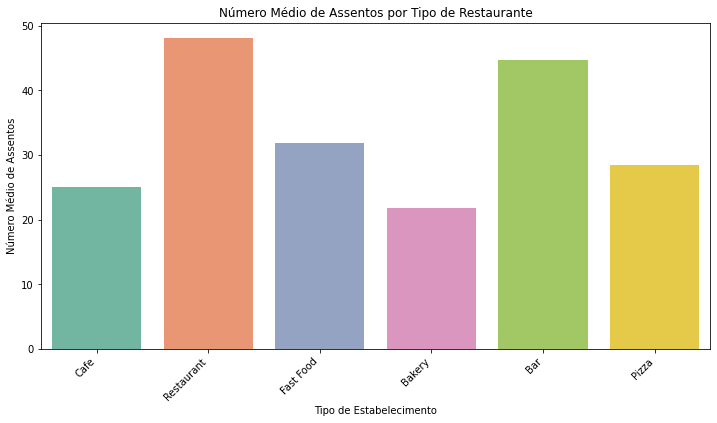

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x='object_type', y='number', data=rest_data, ci=None, palette='Set2')
plt.title('Número Médio de Assentos por Tipo de Restaurante')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Número Médio de Assentos')
plt.xticks(rotation=45, ha='right')
plt.show()


Em média, restaurantes tem maior número de assentos, com uma média de 48 assentos por restaurante, mas os bares ficam logo atrás com 44 assentos por bar.

## Conclusões

<b>Conclusão Geral e Recomendações:</b>

Ao analisar os dados sobre restaurantes em Los Angeles, podemos tirar algumas conclusões e fazer recomendações estratégicas:

<b>Diversidade dos estabelecimentos:</b>

Os dados revelam uma diversidade de tipos de estabelecimentos, incluindo cafés, restaurantes e fast foods.

- Recomendação: Considerando a preferência local, estabelecimentos do tipo restaurante e bar são mais comuns, o que pode indicar que são muito frequentados, porém se considerarmos a concorrência ao escolher o tipo de estabelecimento, uma cafeteria seria ou fast food seriam mais adequados, já que existe um grande número desses estabelecimentos, mas não são tantos quanto os restaurantes ou bares.

<b>Redes vs. Estabelecimentos Independentes:</b>

A presença de cadeias (redes) é notável, mas muitos estabelecimentos são independentes.

- Recomendação: Como foi analizado, o estabelecimentos em uma rede são mais comuns, o que indica que há demanda local, é necessário avaliar a viabilidade de desenvolver uma rede.

<b>Capacidade de Assentos:</b>

A análise das distribuições de assentos em ruas específicas mostra uma variação significativa na capacidade entre os restaurantes.
- Recomendação: Ajustar a capacidade de assentos com base nas preferências locais e na concorrência. Considere diferentes capacidades para atender a diferentes demandas.

<b>Ruas com Muitos Restaurantes:</b>

Algumas ruas têm uma concentração considerável de restaurantes.
- Recomendação: Avaliar a saturação de mercado nessas áreas antes de decidir abrir um novo estabelecimento. Pode haver oportunidades, mas a concorrência também será intensa.

<b>Desenvolvimento de Rede:</b>

A possibilidade de desenvolver uma rede de restaurantes pode depender da demanda, preferências locais e capacidade de oferecer uma proposta única.
- Recomendação: Investir em pesquisas de mercado detalhadas para identificar oportunidades e nichos específicos que uma rede de restaurantes poderia explorar.

<b>Adaptação Contínua:</b>

A dinâmica do mercado pode mudar ao longo do tempo, portanto, é essencial monitorar continuamente as tendências, a concorrência e as preferências do consumidor.
- Recomendação: Manter a flexibilidade e estar disposto a adaptar o tipo de restaurante e a capacidade de assentos conforme necessário.

Em resumo, para alcançar o sucesso no mercado de restaurantes em Los Angeles, é crucial compreender profundamente as nuances do mercado local. A capacidade de oferecer uma proposta única e adaptar-se às mudanças nas preferências dos consumidores e no cenário competitivo são fatores determinantes.

Considerando a possibilidade de desenvolver uma rede de restaurantes, isso pode ser uma estratégia promissora, desde que baseada em análises de mercado sólidas. É vital identificar lacunas no mercado, entender as necessidades específicas dos consumidores e oferecer uma proposta de valor diferenciada. A flexibilidade para ajustar a estratégia com base nas dinâmicas do mercado é essencial para o sucesso a longo prazo.

Em última análise, o êxito no setor de restaurantes exigirá uma abordagem estratégica e adaptativa, alinhada com as características e demandas únicas do mercado local em Los Angeles.

<b>Recomendações:</b>

Se a intenção for fugir da concorrência, abrir uma cafeteria é a melhor opção, nesse caso, deve-se considerar adotar o modelo de franquia, ou seja, muitos estabelecimentos, com um pequeno número de assentos, em média 25 assentos por estabelecimento, que é o modelo mais comum para cafeterias. Em uma rua que não tenha muitas cafeterias.

Porém, se for levar em consideração a preferência do público, os restaurantes são mais procurados. Caso a preferência seja por restaurante, podemos escolher dentre as ruas que possuem muitos estabelecimentos, mas não tantos a ponto de saturar o mercado, a 450 Western Ave parece uma boa opção, pois possui apenas 6 estabelecimentos com poucos assentos. Um restaurante que não pertença a uma franquia poderia ter uma média de 48 assentos.


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho excelente.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente
- Bons gráficos
- Uso de recursos avançados (ex: função lambda)
- Apresentação impecável (bem escrito, uso de tópicos, análise sobre os gráficos)

Você apresentou maturidade no projeto. Parabéns. 
Desejo sucesso na jornada.
Conte conosco.
</div>